Step 1. Importing necessary libraries

In [30]:
import pandas as pd #for loading and processing the data
from sklearn.feature_extraction.text import TfidfVectorizer #to turn words into vectors
import matplotlib.pyplot as plt #this and wordcloud for visualization
from wordcloud import WordCloud

# for NLP import NLTK and stopword and punkt from it

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Step 2. Load and view the csv data using pandas

In [31]:
df = pd.read_csv("/content/Amazon-Product-Reviews.csv")
print(df.head())
print('-'*100)
print(df.info())

                                              Review  Sentiment
0  Fast shipping but this product is very cheaply...          1
1  This case takes so long to ship and it's not e...          1
2  Good for not droids. Not good for iPhones. You...          1
3  The cable was not compatible between my macboo...          1
4  The case is nice but did not have a glow light...          1
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


Step 3. Processing/cleaning the data

In [32]:
df.dropna(inplace=True) #drop null values
#encode Sentiment categories 1, 2, 3 as negative (0), and 4, and 5 as positive (1)
df.loc[df['Sentiment']<=3,'Sentiment'] = 0
df.loc[df['Sentiment']>3,'Sentiment'] = 1
#clean reviews by removing stopwords (e.g. is, the, and). These word do not contribute much to convey the sentiments rather add to noise

stop_words = stopwords.words('english')

def clean_text(text):
  return ' '.join(word for word in text.split() if word not in stop_words)

df['Review'] = df['Review'].apply(clean_text)

Step 4. View the clean data

In [33]:
print(df.head())
print('-'*100)
print(df['Sentiment'].value_counts())

                                              Review  Sentiment
0  Fast shipping product cheaply made I brought g...          0
1  This case takes long ship even worth DONT BUY!!!!          0
2  Good droids. Not good iPhones. You cannot use ...          0
3  The cable compatible macbook iphone. Also conn...          0
4  The case nice glow light. I'm disappointed pro...          0
----------------------------------------------------------------------------------------------------
Sentiment
0    15000
1     9999
Name: count, dtype: int64


Step 5. Visualize some negative (0) words

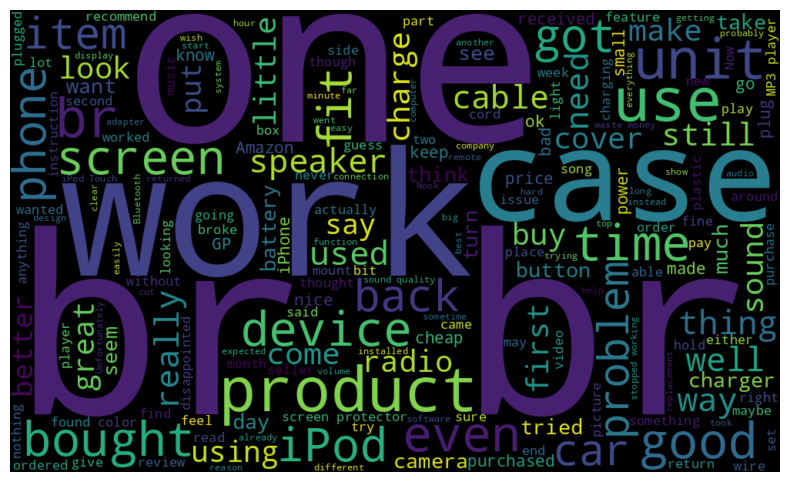

In [34]:
neg_words = ' '.join(text for text in df['Review'][df['Sentiment']==0].astype(str))
wc = WordCloud(width=1000, height= 600, random_state = 42)
plt.figure(figsize=(12, 6))
plt.imshow(wc.generate(neg_words), interpolation = 'bilinear')
plt.axis('off')
plt.show()

Step 6. Visualize some positive (1) words

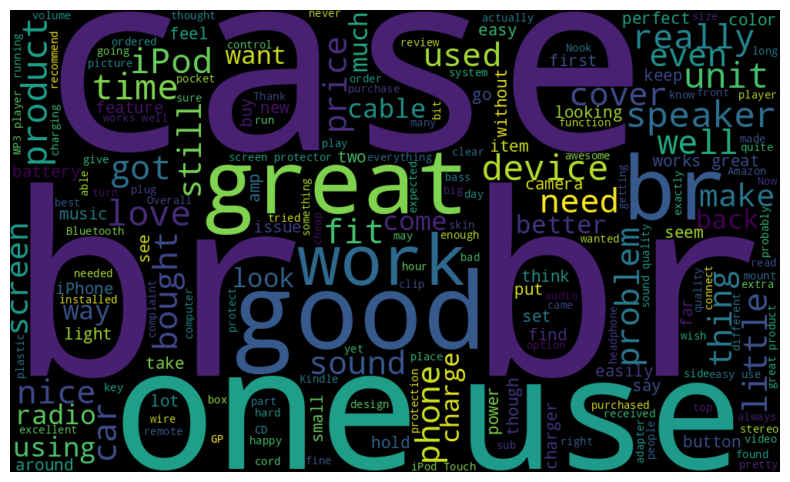

In [35]:
pos_words = ' '.join(text for text in df['Review'][df['Sentiment']==1].astype(str))
wc = WordCloud(width=1000, height= 600, random_state = 42)
plt.figure(figsize=(12, 6))
plt.imshow(wc.generate(pos_words), interpolation = 'bilinear')
plt.axis('off')
plt.show()

Step 7. Vectorize the text

In [36]:
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(df['Review']).toarray()

Step 8. Split the data into train and test set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.2, random_state=42)

Step 9. Train the ML model. Here we are going to use a simple Logistic Regressor

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Step 10. View the accuracy on the test set

In [39]:
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.8202


Step 11. Let's view the confusion matrix

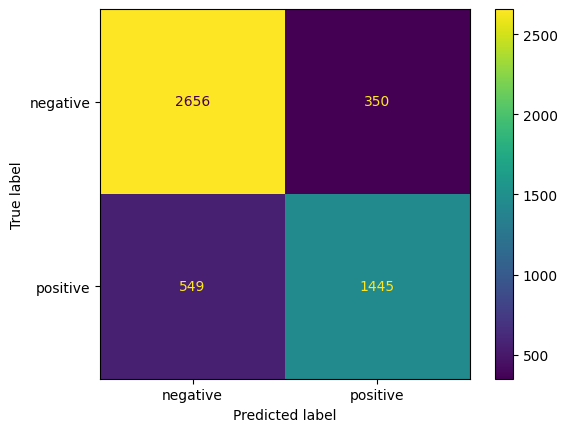

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm = confusion_matrix(y_test, pred)

cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
cm_disp.plot()
plt.show()
